In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv(r'C:\Users\jacky\Downloads\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Data cleaning section
#checking if there are empty cells
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
#Data cleaning section
# Using "for" loop with formatting.
#Just capitalizing the column names in the output for a better view.
for col in df.columns:
    count_of_nulls = df[col].isnull().sum()
    col = col.upper()
    print("{} has {} null value(s)".format(col,count_of_nulls))

NAME has 0 null value(s)
RATING has 77 null value(s)
GENRE has 0 null value(s)
YEAR has 0 null value(s)
RELEASED has 2 null value(s)
SCORE has 3 null value(s)
VOTES has 3 null value(s)
DIRECTOR has 0 null value(s)
WRITER has 3 null value(s)
STAR has 1 null value(s)
COUNTRY has 3 null value(s)
BUDGET has 2171 null value(s)
GROSS has 189 null value(s)
COMPANY has 17 null value(s)
RUNTIME has 4 null value(s)


In [5]:
#Data cleaning section
#checking date types
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [6]:
#copied main df into a new df
new_df = df.copy()

In [7]:
#Data cleaning section
#Cleaning empty cells
new_df.dropna(inplace= True)

In [8]:
#Data cleaning section
#Checking for nulls again (Perfect, no more nulls!)
new_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [9]:
#change the data type to int instead.
new_df['budget'] = new_df['budget'].astype('int64')
new_df['gross'] = new_df['gross'].astype('int64')
new_df['runtime'] = new_df['runtime'].astype('int64')

In [10]:
print(new_df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object


In [11]:
#This line of code serparates the years from the line of strings in "released" columns.
#demostrating splitting and dropping columns
new_df[['Corrected_monthday','Correct_year']] = new_df['released'].str.split(', ', expand =True)
new_df['Correct_year'] = new_df['Correct_year'].astype(str).str[:4]
new_df.drop(columns = ['Corrected_monthday'], inplace = True)
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [12]:
#Checking to see if there are some non-intergers in the column( there is )
new_df['Correct_year'].unique()

array(['1980', '1981', '1984', '1983', '1982', 'None', '1987', '1985',
       '1986', '1990', '1988', '1992', '1989', '1991', '1999', '1994',
       '1993', '1995', '2001', '1996', '2000', '1997', '1998', '2002',
       '2003', '2004', '2014', '2005', '2006', '2007', '2008', '2010',
       '2009', '2013', '2011', '2016', '2015', '2012', '2017', '2018',
       '2019', '2020'], dtype=object)

In [13]:
#Filering the non-intergers and seeing how many are there. (quite a few but not too much)
filt01 = new_df['Correct_year'] == 'None'
new_df.loc[filt01,'Correct_year']

312     None
449     None
467     None
800     None
1173    None
1212    None
1404    None
1819    None
2029    None
2318    None
2319    None
2816    None
4187    None
5833    None
Name: Correct_year, dtype: object

In [14]:
#Delete the rows contains non-intergers in 'Correct_year' column.
filt02 = new_df['Correct_year'] == 'None'
new_df.drop(index = new_df[filt02].index, inplace = True)

In [15]:
#checking to see if its gone(gone)
filt01 = new_df['Correct_year'] == 'None'
new_df.loc[filt01,'Correct_year']

Series([], Name: Correct_year, dtype: object)

In [16]:
#Now we can finally change the date type of the column to int
new_df['Correct_year'] = new_df['Correct_year'].astype('int64')

In [17]:
#checking if it changes (success, it changes)
new_df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime           int64
Correct_year      int64
dtype: object

In [18]:
#checking duplicates
new_df.duplicated().sum()

0

In [19]:
#If there are duplicates use drop_duplicates(inplace=True)
new_df.drop_duplicates(inplace=True)

In [20]:
#Data exploration Section
#checking unique values of a column
new_df['rating'].unique()

array(['R', 'PG', 'G', 'NC-17', 'Approved', 'Not Rated', 'PG-13',
       'Unrated', 'X', 'TV-MA'], dtype=object)

In [21]:
#There are 5407 rows, and 16 columns in total
new_df.shape

(5407, 16)

In [22]:
#Data Exploration, Filting Section
#all the columns and selected rows
new_df.loc[1:2]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Correct_year
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980


In [23]:
#selecting columns (all rows)
new_df.loc[ : ,['rating','genre']]

,rating,genre
0,R,Drama
1,R,Adventure
2,PG,Action
3,PG,Comedy
4,R,Comedy
...,...,...
7648,R,Action
7649,PG,Action
7650,PG,Adventure
7651,PG,Adventure


In [24]:
#Selecting records with filtering 
#getting names with "R" rating
new_df.loc[(new_df['rating']=='R'),['name','rating']]

,name,rating
0,The Shining,R
1,The Blue Lagoon,R
4,Caddyshack,R
5,Friday the 13th,R
6,The Blues Brothers,R
...,...,...
7594,Unplanned,R
7616,High on the Hog,R
7645,Birds of Prey,R
7646,The Invisible Man,R


In [25]:
#Selecting records with more filtering conditions with columns conditions
filt = (new_df['rating']=='R') & (new_df['genre']=='Adventure')
new_df.loc[filt,['name','rating','genre']]

,name,rating,genre
1,The Blue Lagoon,R,Adventure
21,Heaven's Gate,R,Adventure
100,Excalibur,R,Adventure
130,Quest for Fire,R,Adventure
335,National Lampoon's Vacation,R,Adventure
...,...,...,...
6793,Dope,R,Adventure
7069,The Shape of Water,R,Adventure
7149,Girls Trip,R,Adventure
7265,Annihilation,R,Adventure


In [26]:
#Only want records with 1980 in "released" column wiht column conditions
filt = (new_df['released'].str.contains('1980')) & (new_df['budget']<1050000)
new_df.loc[filt,['name','rating','genre','year','budget']]

,name,rating,genre,year,budget
5,Friday the 13th,R,Horror,1980,550000
18,The Fog,R,Horror,1980,1000000


In [27]:
#Renaming a column
new_df.rename(columns = {'Correct_year':'Years_Corrected' }, inplace = True)

In [28]:
#Putting the table here to see if its been correct (yes, it did)
new_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years_Corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [29]:
#Sorting by 'Years_Corrected' column
new_df.sort_values('Years_Corrected', ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years_Corrected
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020
7646,The Invisible Man,R,Drama,2020,"February 28, 2020 (United States)",7.1,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124,2020
7525,Weathering with You,PG-13,Animation,2019,"January 17, 2020 (United States)",7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112,2020
7604,Mine 9,Not Rated,Drama,2019,"May 19, 2020 (Poland)",6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83,2020
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,The Hollywood Knights,R,Comedy,1980,"May 30, 1980 (United States)",6.3,4300.0,Floyd Mutrux,Floyd Mutrux,Tony Danza,United States,4000000,10000000,PolyGram Filmed Entertainment,91,1980
35,Private Benjamin,R,Comedy,1980,"October 10, 1980 (United States)",6.2,24000.0,Howard Zieff,Nancy Meyers,Goldie Hawn,United States,10000000,69847348,Warner Bros.,109,1980
29,American Gigolo,R,Crime,1980,"February 1, 1980 (United States)",6.2,22000.0,Paul Schrader,Paul Schrader,Richard Gere,United States,4800000,22743674,Paramount Pictures,117,1980
28,Brubaker,R,Crime,1980,"June 20, 1980 (United States)",7.2,17000.0,Stuart Rosenberg,W.D. Richter,Robert Redford,United States,9000000,37121708,Twentieth Century Fox,131,1980


In [30]:
#Sorting mulitple columns 
new_df.sort_values(['Years_Corrected','gross'], ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years_Corrected
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149,2020
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124,2020
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119,2020
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,Oh Heavenly Dog,PG,Comedy,1980,"July 11, 1980 (United States)",5.4,2400.0,Joe Camp,Rod Browning,Chevy Chase,United States,6000000,6216067,Mulberry Square Productions,103,1980
77,Willie & Phil,R,Comedy,1980,"August 15, 1980 (United States)",5.9,415.0,Paul Mazursky,Jean Gruault,Michael Ontkean,United States,5500000,4400000,Twentieth Century Fox,115,1980
51,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.8,4500.0,Jonathan Demme,Bo Goldman,Paul Le Mat,United States,7000000,4309490,Universal Pictures,95,1980
56,When Time Ran Out...,PG,Action,1980,"March 28, 1980 (United States)",4.6,2600.0,James Goldstone,Gordon Thomas,Paul Newman,United States,20000000,3763988,International Cinema,121,1980


In [31]:
#Found how many movies were made in each county
new_df['country'].value_counts()

United States                     4310
United Kingdom                     490
Canada                             111
France                             104
Germany                             82
Australia                           42
Japan                               28
China                               26
Hong Kong                           24
Ireland                             21
Italy                               19
Spain                               18
New Zealand                         18
South Korea                         13
Mexico                              10
Denmark                             10
India                                8
Czech Republic                       7
Sweden                               5
South Africa                         4
Russia                               4
Belgium                              4
Switzerland                          4
Taiwan                               3
Norway                               3
West Germany             

In [32]:
#Found the percent total of movies made in each country using 'normailize' in the arguemnt.
new_df['country'].value_counts(normalize = True)

United States                     0.797115
United Kingdom                    0.090623
Canada                            0.020529
France                            0.019234
Germany                           0.015166
Australia                         0.007768
Japan                             0.005178
China                             0.004809
Hong Kong                         0.004439
Ireland                           0.003884
Italy                             0.003514
Spain                             0.003329
New Zealand                       0.003329
South Korea                       0.002404
Mexico                            0.001849
Denmark                           0.001849
India                             0.001480
Czech Republic                    0.001295
Sweden                            0.000925
South Africa                      0.000740
Russia                            0.000740
Belgium                           0.000740
Switzerland                       0.000740
Taiwan     

In [33]:
#The average and the highest gross in each country.
new_df.groupby(['country',])['gross'].agg(['max','mean'])

,max,mean
country,,
Argentina,35079650,2.604541e+07
Aruba,10319915,1.031992e+07
Australia,375658750,6.667391e+07
Austria,53898845,4.178149e+07
Belgium,11020402,5.733134e+06
Brazil,19844979,1.352507e+07
Canada,786470484,5.166269e+07
Chile,27972023,2.797202e+07
China,1236005118,2.425353e+08


In [34]:
#copy new_df into another new table (this one is for charts)
chart_df = new_df.copy()

In [35]:
chart_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Years_Corrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


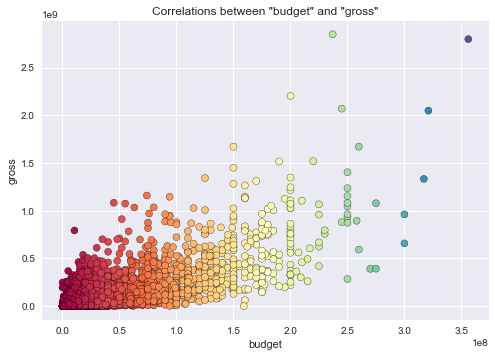

In [37]:
plt.title('Correlations between "budget" and "gross"')
plt.xlabel('budget')
plt.ylabel('gross')
plt.style.use('seaborn')
plt.scatter(chart_df['budget'],chart_df['gross'], c=chart_df['budget'], cmap = 'Spectral', edgecolor = 'black')

In [38]:
#finding correlations (the closer we are to 1 the better)
chart_df.corr()

,year,score,votes,budget,gross,runtime,Years_Corrected
year,1.000000,0.055681,0.204904,0.326740,0.273512,0.074849,0.998962
score,0.055681,1.000000,0.474594,0.071552,0.222504,0.414501,0.061443
votes,0.204904,0.474594,1.000000,0.439077,0.614432,0.352263,0.202215
budget,0.326740,0.071552,0.439077,1.000000,0.740028,0.318353,0.319669
gross,0.273512,0.222504,0.614432,0.740028,1.000000,0.275641,0.268141
runtime,0.074849,0.414501,0.352263,0.318353,0.275641,1.000000,0.075183
Years_Corrected,0.998962,0.061443,0.202215,0.319669,0.268141,0.075183,1.000000
